

# Initial Setup



In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import os
import tensorflow as tf
import numpy as np

# Set the seed for random operations. 
# Letting experiments to be reproducible. 
SEED = 1234
tf.random.set_seed(SEED) 
np.random.seed(SEED)

# Get current working directory
cwd = os.getcwd()

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Dataset Retrivial

In [4]:
# Option to set to true the first time to RETRIEVE the dataset and create the
# folder structure. If set to false it expects the dataset to be already 
# splitted and zipped in your drive in the directory "Challenge_2".
SPLIT_DATASET = False

# This option let you use your dataset_split.json file, that must be located in 
# your drive in the directory "Challenge_2", for the dataset split.
# Is considered only if SPLIT_DATASET == True since if SPLIT_DATASET == 
# False the dataset is expected to be already splitted and zipped in your
# drive in the directory "Challenge_2".
LOAD_FROM_JSON = False

### Cell executed if: SPLIT_DATASET = True 

In [ ]:
import json

split = {}
split['Training'] = {}

teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
plants = ['Haricot', 'Mais']

# Random seed for reproducibility
np.random.seed(SEED)

for t in teams:
  split['Training'][t] = {}
  for p in plants:
      
    print(os.path.join(cwd, 'Development_Dataset/Training/' + t + '/' + p + '/' + 'Masks', 'prova' + '.png'))

In [ ]:
! rm -r Development_Dataset_15/
! rm -r Development_Dataset/
! rm dataset_split.json

In [ ]:
if SPLIT_DATASET == True:
  ! unzip '/content/drive/My Drive/Challenge_2/Development_Dataset.zip'

Archive:  /content/drive/My Drive/Challenge_2/Development_Dataset.zip
  inflating: Development_Dataset/LICENSE.txt  
   creating: Development_Dataset/Test_Dev/
   creating: Development_Dataset/Test_Dev/Bipbip/
   creating: Development_Dataset/Test_Dev/Bipbip/Haricot/
   creating: Development_Dataset/Test_Dev/Bipbip/Haricot/Images/
  inflating: Development_Dataset/Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_00211.jpg  
  inflating: Development_Dataset/Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_00581.jpg  
  inflating: Development_Dataset/Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_00721.jpg  
  inflating: Development_Dataset/Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_00951.jpg  
  inflating: Development_Dataset/Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_01341.jpg  
  inflating: Development_Dataset/Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_02421.jpg  
  inflating: Development_Dataset/Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_02781.jpg  
  inflati

In [ ]:
# -----------------------------
# Create the dataset_split.json 
# -----------------------------
if SPLIT_DATASET == True and LOAD_FROM_JSON == False:

  from PIL import Image
  import json
  
  VALIDATION_SPLIT = 0.15

  split = {}
  split['training'] = {}
  split['validation'] = {}

  teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
  plants = ['Haricot', 'Mais']

  # Random seed for reproducibility
  np.random.seed(SEED)

  for t in teams:

    split['training'][t] = {}
    split['validation'][t] = {}

    for p in plants:

      split['training'][t][p] = []      
      split['validation'][t][p] = []

      image_filenames = os.listdir('/content/Development_Dataset/Training/' + t + '/' + p + '/' + 'Images')
      # Shuffle the images to get a random split
      np.random.shuffle(image_filenames)
          
      # Create training split
      for i in range(int(len(image_filenames) * (1 - VALIDATION_SPLIT))):
        image_name = image_filenames[i].split('.')
        split['training'][t][p].append(image_name)

      
      # Create validation split
      for j in range(i + 1, len(image_filenames)):
        image_name = image_filenames[j].split('.')
        split['validation'][t][p].append(image_name)

  with open(os.path.join(cwd, 'dataset_split.json'), 'w') as f:
    json.dump(split, f)

  ! cp '/content/dataset_split.json' '/content/drive/My Drive/Challenge_2/dataset_split.json'

In [ ]:
# ------------------------------------------
# Create the splitted dataset directory tree 
# ------------------------------------------
if SPLIT_DATASET == True:
  import shutil
  
  # Use your dataset_split.json 
  # ---------------------------
  if LOAD_FROM_JSON == True:
    import json
    f = open('/content/drive/My Drive/Challenge_2/dataset_split.json')
    split = json.load(f) 
  # ---------------------------


  # Create the folder for the splitted dataset
  # ------------------------------------------
  ! mkdir '/content/Development_Dataset_15'

  ! mkdir '/content/Development_Dataset_15/training'
  ! mkdir '/content/Development_Dataset_15/training/images'
  ! mkdir '/content/Development_Dataset_15/training/masks'

  ! mkdir '/content/Development_Dataset_15/validation'
  ! mkdir '/content/Development_Dataset_15/validation/images'
  ! mkdir '/content/Development_Dataset_15/validation/masks'
  # ------------------------------------------

  teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
  plants = ['Haricot', 'Mais']

  for t in teams:
    for p in plants:

      for img_name in split['training'][t][p]:
        
        src_path = os.path.join(cwd, 'Development_Dataset/Training/' + t + '/' + p + '/' + 'Images', img_name[0] + '.' + img_name[1])
        dst_path = os.path.join(cwd, 'Development_Dataset_15/training/images')
        shutil.move(src_path, dst_path)

        src_path = os.path.join(cwd, 'Development_Dataset/Training/' + t + '/' + p + '/' + 'Masks', img_name[0] + '.png')
        dst_path = os.path.join(cwd, 'Development_Dataset_15/training/masks')
        shutil.move(src_path, dst_path)

      for img_name in split['validation'][t][p]:
    
        src_path = os.path.join(cwd, 'Development_Dataset/Training/' + t + '/' + p + '/' + 'Images', img_name[0] + '.' + img_name[1])
        dst_path = os.path.join(cwd, 'Development_Dataset_15/validation/images')
        shutil.move(src_path, dst_path)
    
        src_path = os.path.join(cwd, 'Development_Dataset/Training/' + t + '/' + p + '/' + 'Masks', img_name[0] + '.png')
        dst_path = os.path.join(cwd, 'Development_Dataset_15/validation/masks')
        shutil.move(src_path, dst_path)

In [ ]:
! ls

dataset_split.json   Development_Dataset_15  sample_data
Development_Dataset  drive


In [ ]:
# ------------------------------------------------------------------------------------------
# Zip the splitted dataset for the next executions, to avoid the splitting process each time
# ------------------------------------------------------------------------------------------
if SPLIT_DATASET == True:
  ! zip -r '/content/drive/My Drive/Challenge_2/Development_Dataset_15.zip' 'Development_Dataset_15'

### Cell executed if: SPLIT_DATASET = False 

In [5]:
# ------------------------------------------
# Unzip the splitted dataset from your drive
# ------------------------------------------
if SPLIT_DATASET == False:
  ! unzip '/content/drive/My Drive/Challenge_2/Development_Dataset_15.zip'

Archive:  /content/drive/My Drive/Challenge_2/Development_Dataset_15.zip
   creating: Development_Dataset_15/
   creating: Development_Dataset_15/validation/
   creating: Development_Dataset_15/validation/images/
  inflating: Development_Dataset_15/validation/images/Bipbip_mais_im_05221.jpg  
  inflating: Development_Dataset_15/validation/images/Roseau_mais_0336_false.png  
  inflating: Development_Dataset_15/validation/images/Roseau_haricot_0212_false.png  
  inflating: Development_Dataset_15/validation/images/Bipbip_mais_im_01601.jpg  
  inflating: Development_Dataset_15/validation/images/Roseau_mais_0140_false.png  
  inflating: Development_Dataset_15/validation/images/Bipbip_mais_im_01871.jpg  
  inflating: Development_Dataset_15/validation/images/Roseau_mais_0120_false.png  
  inflating: Development_Dataset_15/validation/images/Pead_mais_00666_i900.jpg  
  inflating: Development_Dataset_15/validation/images/Pead_mais_00615_i900.jpg  
  inflating: Development_Dataset_15/validation/

In [9]:
# ------------------------------------------
# Unzip the splitted dataset from your drive
# ------------------------------------------
if SPLIT_DATASET == False:
  ! cp '/content/drive/My Drive/Challenge_2/dataset_split.json' '/content/dataset_split.json' 

# Dataset Setup

In [7]:
# --------------------------------------------------------------------------------------
# Create the training and validation ImageDataGenerator objects for from scratch network
# --------------------------------------------------------------------------------------
#def data_generator(apply_data_augmentation):

from tensorflow.keras.preprocessing.image import ImageDataGenerator

apply_data_augmentation = True

# Create training ImageDataGenerator object
# We need two different generators for images and corresponding masks
if apply_data_augmentation:
  img_data_gen = ImageDataGenerator(rotation_range=10,
                                      width_shift_range=10,
                                      height_shift_range=10,
                                      zoom_range=0.3,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      fill_mode='reflect')
    
  mask_data_gen = ImageDataGenerator(rotation_range=10,
                                       width_shift_range=10,
                                       height_shift_range=10,
                                       zoom_range=0.3,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       fill_mode='reflect')
    
#return img_data_gen, mask_data_gen

# Example: Image Segmentation
## Build segmentation

In [ ]:
'''
  Given an RGB plant image, the functions in this file
  calculate the extra features for addition to CNN.
'''

import cv2
import numpy as np


def contrast_stretch(img):
  """
  Performs a simple contrast stretch of the given image, in order to remove
  extreme outliers.
  """
  in_min = np.percentile(img, 0.05)
  in_max = np.percentile(img, 99.95)

  out_min = 0.0
  out_max = 255.0

  out = img - in_min
  out *= out_max / (in_max - in_min)

  out[out < out_min] = 0.0
  out[out > out_max] = 255.0

  return out


def contrast_stretch_const(img, in_min, in_max):
  """
  Performs a simple contrast stretch of the given image, in order to remove
  extreme outliers.
  """
  out_min = 0.0
  out_max = 255.0

  out = img - in_min
  out *= out_max / (in_max - in_min)

  out[out < out_min] = 0.0
  out[out > out_max] = 255.0

  return out


def thresh(img, conservative=0, min_blob_size=50):
  '''
    Get threshold to make mask using the otsus method, and apply a correction
    passed in conservative (-100;100) as a percentage of th.
  '''

  # blur and get level using otsus
  blur = cv2.GaussianBlur(img, (13, 13), 0)
  level, _ = cv2.threshold(
      blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE)

  # print("Otsus Level: ",level)

  # change with conservative
  level += conservative / 100.0 * level

  # check boundaries
  level = 255 if level > 255 else level
  level = 0 if level < 0 else level

  # mask image
  _, mask = cv2.threshold(blur, level, 255, cv2.THRESH_BINARY)

  # morph operators
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
  mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

  # remove small connected blobs
  # find connected components
  n_components, output, stats, centroids = cv2.connectedComponentsWithStats(
      mask, connectivity=8)
  # remove background class
  sizes = stats[1:, -1]
  n_components = n_components - 1

  # remove blobs
  mask_clean = np.zeros((output.shape))
  # for every component in the image, keep it only if it's above min_blob_size
  for i in range(0, n_components):
    if sizes[i] >= min_blob_size:
      mask_clean[output == i + 1] = 255

  return mask_clean


def exgreen(img):
  '''
    Returns the excess green of the image as:
      exgreen = 2 * G - R - B
  '''

  # get channels
  B, G, R = cv2.split(img)

  # normalize
  B_ = B.astype(float) / np.median(B.astype(float))
  G_ = G.astype(float) / np.median(G.astype(float))
  R_ = R.astype(float) / np.median(R.astype(float))

  E = B_ + G_ + R_ + 0.001
  b = B_ / E
  g = G_ / E
  r = R_ / E

  # calculate exgreen
  exgr = 2.8 * g - r - b

  # expand contrast
  exgr = contrast_stretch(exgr)

  # convert to saveable image
  exgr = exgr.astype(np.uint8)

  return exgr


def cive(img):
  '''
    Returns the inverse color index of vegetation extraction of the image as:
      cive = 0.881 * g - 0.441 * r - 0.385 * b - 18.78745
  '''

  # get channels
  B, G, R = cv2.split(img)

  # normalize
  B_ = B.astype(float) / np.median(B.astype(float))
  G_ = G.astype(float) / np.median(G.astype(float))
  R_ = R.astype(float) / np.median(R.astype(float))

  E = B_ + G_ + R_ + 0.001
  b = B_ / E
  g = G_ / E
  r = R_ / E

  # calculate cive
  c = 0.881 * g - 0.441 * r - 0.385 * b - 18.78745

  # expand contrast
  c = contrast_stretch(c)

  # convert to saveable image
  c = c.astype(np.uint8)

  return c


def exred(img):
  '''
    Returns the excess green (inverted, to comply with other masks) of the image as:
      exred = 1.4 * R - G
  '''

  # get channels
  B, G, R = cv2.split(img)

  # normalize
  B_ = B.astype(float) / np.median(B.astype(float))
  G_ = G.astype(float) / np.median(G.astype(float))
  R_ = R.astype(float) / np.median(R.astype(float))

  E = B_ + G_ + R_ + 0.001
  b = B_ / E
  g = G_ / E
  r = R_ / E

  # calculate exgreen
  exr = 1.4 * r - g

  # expand contrast
  exr = contrast_stretch(exr)

  # convert to saveable image
  exr = exr.astype(np.uint8)

  return exr


def ndi(img):
  '''
    Get the normalized diference index
  '''
  # get channels
  B, G, R = cv2.split(img)

  # normalize
  B_ = B.astype(float) / np.median(B.astype(float))
  G_ = G.astype(float) / np.median(G.astype(float))
  R_ = R.astype(float) / np.median(R.astype(float))

  E = B_ + G_ + R_ + 0.001
  b = B_ / E
  g = G_ / E
  r = R_ / E

  # calculate ndi
  idx = (g - r) / (g + r)

  # expand contrast
  idx = contrast_stretch(idx)

  # convert to saveable image
  idx = idx.astype(np.uint8)

  return idx


def hsv(img):
  '''
    Convert image to hsv
  '''

  ret = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  return ret


def edges(mask):
  '''
    Get edges with canny detector
  '''
  # blur
  mask = cv2.GaussianBlur(mask, (5, 5), 0)

  edges = cv2.Canny(mask, 100, 200)

  # stretch
  edges = contrast_stretch(edges)

  # cast
  edges = np.uint8(edges)

  return edges


def laplacian(mask):
  '''
    Get 2nd order gradients using the Laplacian
  '''

  # blur
  mask = cv2.GaussianBlur(mask, (5, 5), 0)

  # edges with laplacian
  laplacian = cv2.Laplacian(mask, cv2.CV_64F, 5)

  # stretch
  laplacian = contrast_stretch(laplacian)

  # cast
  laplacian = np.uint8(laplacian)

  return laplacian


def gradients(mask, direction='x'):
  '''
    Get gradients using sobel operator
  '''
  mask = cv2.GaussianBlur(mask, (5, 5), 0)

  if direction == 'x':
    # grad x
    sobel = cv2.Sobel(mask, cv2.CV_64F, 1, 0, ksize=7)
  elif direction == 'y':
    # grad y
    sobel = cv2.Sobel(mask, cv2.CV_64F, 0, 1, ksize=7)
  else:
    print("Invalid gradient direction. Must be x or y")
    quit()

  # sobel = np.absolute(sobel)
  sobel = contrast_stretch(sobel)   # expand contrast
  sobel = np.uint8(sobel)

  return sobel


def watershed(rgb, idx, mask):
  '''
    Get watershed transform from image
  '''

  # kernel definition
  kernel = np.ones((3, 3), np.uint8)

  # sure background area
  sure_bg = cv2.dilate(mask, kernel)
  sure_bg = np.uint8(sure_bg)
  # util.im_gray_plt(sure_bg,"sure back")

  # Finding sure foreground area
  dist_transform = cv2.distanceTransform(np.uint8(mask), cv2.DIST_L2, 3)
  # util.im_gray_plt(dist_transform,"dist transform")
  ret, sure_fg = cv2.threshold(
      dist_transform, 0.5 * dist_transform.max(), 255, 0)

  # Finding unknown region
  sure_fg = np.uint8(sure_fg)
  # util.im_gray_plt(sure_fg,"sure fore")

  unknown = cv2.subtract(sure_bg, sure_fg)
  # util.im_gray_plt(unknown,"unknown")

  # marker labelling
  ret, markers = cv2.connectedComponents(sure_fg)

  # add one to all labels so that sure background is not 0, but 1
  markers = markers + 1

  # mark the region of unknown with zero
  markers[unknown == 255] = 0

  # util.im_gray_plt(np.uint8(markers),"markers")

  # apply watershed
  markers = cv2.watershed(rgb, markers)

  # create limit mask
  mask = np.zeros(mask.shape, np.uint8)
  mask[markers == -1] = 255

  return mask


def mask_multidim(img, mask):
  '''
    mask an image with a mask (0,255)
  '''
  ret = np.array(img)
  if len(img.shape) == 3:
    ret[mask == 0, :] = 0
  elif len(img.shape) == 2:
    ret[mask == 0] = 0
  else:
    # unknown shape
    ret = img

  return ret


def chanelwise_norm(img):
  '''
    Returns the normalized image:
  '''
  ret = np.array(img)

  # expand contrast
  for i in range(img.shape[2]):
    ret[:, :, i] = contrast_stretch(ret[:, :, i].astype(float))

  # convert to saveable image
  ret = ret.astype(np.uint8)

  return ret

'\n  Given an RGB plant image, the functions in this file\n  calculate the extra features for addition to CNN.\n'

In [6]:
from PIL import Image

class CustomDataset(tf.keras.utils.Sequence):

  """
    CustomDataset inheriting from tf.keras.utils.Sequence.

    3 main methods:
      - __init__: save dataset params like directory, filenames..
      - __len__: return the total number of samples in the dataset
      - __getitem__: return a sample from the dataset

    Note: 
      - the custom dataset return a single sample from the dataset. Then, we use 
        a tf.data.Dataset object to group samples into batches.
      - in this case we have a different structure of the dataset in memory. 
        We have all the images in the same folder and the training and validation splits
        are defined in text files.

  """

  def __init__(self, dataset_dir, which_subset, img_generator=None, mask_generator=None, 
               preprocessing_function=None, out_shape=[500, 500]):
    import json
    
    subset_file = os.path.join('/content', 'dataset_split.json')
    with open(subset_file, 'r') as f:
      split = json.load(f)
    
    teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
    plants = ['Haricot', 'Mais']
    
    subset_filenames = []
    
    for t in teams:
      for p in plants:
        
        for img_name in split[which_subset][t][p]:
          subset_filenames.append(img_name) 

    self.which_subset = which_subset
    self.dataset_dir = dataset_dir
    self.subset_filenames = subset_filenames
    self.img_generator = img_generator
    self.mask_generator = mask_generator
    self.preprocessing_function = preprocessing_function
    self.out_shape = out_shape

  def __len__(self):
    return len(self.subset_filenames)

  def __getitem__(self, index):
    # Read Image
    curr_filename = self.subset_filenames[index]
    img = Image.open(os.path.join(self.dataset_dir, self.which_subset, 'images', curr_filename[0] + '.' + curr_filename[1]))
    mask = Image.open(os.path.join(self.dataset_dir, self.which_subset, 'masks', curr_filename[0] + '.png'))

    # Resize image and mask
    img = img.resize(self.out_shape)
    mask = mask.resize(self.out_shape, resample=Image.NEAREST)    

    img_arr = np.array(img)
    mask_arr = np.array(mask)
    
    # RGB to target
    # -------------
    new_mask_arr = np.zeros(mask_arr.shape[:2], dtype=mask_arr.dtype)

    # Use RGB dictionary in 'RGBtoTarget.txt' to convert RGB to target
    new_mask_arr[np.where(np.all(mask_arr == [0, 0, 0], axis=-1))] = 0
    new_mask_arr[np.where(np.all(mask_arr == [216, 124, 18], axis=-1))] = 0
    new_mask_arr[np.where(np.all(mask_arr == [255, 255, 255], axis=-1))] = 1
    new_mask_arr[np.where(np.all(mask_arr == [216, 67, 82], axis=-1))] = 2

    mask_arr = np.expand_dims(new_mask_arr, -1)
    # -------------

    # in this dataset 255 mask label is assigned to an additional class, which corresponds 
    # to the contours of the objects. We remove it for simplicity.
    #mask_arr[mask_arr == 255] = 0  

    if self.which_subset == 'training':
      if self.img_generator is not None and self.mask_generator is not None:
        # Perform data augmentation
        # We can get a random transformation from the ImageDataGenerator using get_random_transform
        # and we can apply it to the image using apply_transform
        img_t = self.img_generator.get_random_transform(img_arr.shape, seed=SEED)
        mask_t = self.mask_generator.get_random_transform(mask_arr.shape, seed=SEED)
        img_arr = self.img_generator.apply_transform(img_arr, img_t)
        # ImageDataGenerator use bilinear interpolation for augmenting the images.
        # Thus, when applied to the masks it will output 'interpolated classes', which
        # is an unwanted behaviour. As a trick, we can transform each class mask 
        # separately and then we can cast to integer values (as in the binary segmentation notebook).
        # Finally, we merge the augmented binary masks to obtain the final segmentation mask.
        out_mask = np.zeros_like(mask_arr)
        for c in np.unique(mask_arr):
          if c > 0:
            curr_class_arr = np.float32(mask_arr == c)
            curr_class_arr = self.mask_generator.apply_transform(curr_class_arr, mask_t)
            # from [0, 1] to {0, 1}
            curr_class_arr = np.uint8(curr_class_arr)
            # recover original class
            curr_class_arr = curr_class_arr * c 
            out_mask += curr_class_arr
    else:
      out_mask = mask_arr
    
    if self.preprocessing_function is not None:
        img_arr = self.preprocessing_function(img_arr)

    return img_arr, np.float32(out_mask)

In [10]:
from tensorflow.keras.applications.vgg16 import preprocess_input 

img_h = 256
img_w = 256

dataset = CustomDataset('/content/Development_Dataset_15',
                        'training', 
                        img_generator=img_data_gen, 
                        mask_generator=mask_data_gen,
                        out_shape=[img_h, img_w]
                        )

dataset_valid = CustomDataset('/content/Development_Dataset_15',
                              'validation',
                              out_shape=[img_h, img_w]
                              )


In [ ]:
! ls

dataset_split.json   Development_Dataset_15  sample_data
Development_Dataset  drive


In [11]:

train_dataset = tf.data.Dataset.from_generator(lambda: dataset,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1]))

train_dataset = train_dataset.batch(32)

train_dataset = train_dataset.repeat()

valid_dataset = tf.data.Dataset.from_generator(lambda: dataset_valid,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([img_h, img_w, 3], [img_h, img_w, 1]))
valid_dataset = valid_dataset.batch(32)

valid_dataset = valid_dataset.repeat()

In [ ]:
!ls /content/VOCDataset

ls: cannot access '/content/VOCDataset': No such file or directory


In [12]:
# Let's test data generator
# -------------------------
import time
from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib inline

# Assign a color to each class
evenly_spaced_interval = np.linspace(0, 1, 3)
colors = [cm.rainbow(x) for x in evenly_spaced_interval]

iterator = iter(train_dataset)

In [13]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


def im_plt(img, title=None):
  """
    Open image and print it on screen
  """
  plt.ion()
  plt.figure()
  plt.imshow(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB))
  if title is not None:
    plt.title(str(title))


def im_tight_plt(img):
  """
    Open image and print it without borders on screen
  """
  plt.ion()
  fig, ax = plt.subplots()
  fig.subplots_adjust(0, 0, 1, 1)
  ax.axis("off")
  ax.imshow(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB))


def im_gray_plt(img, title=None):
  """
    Open grayscale image and print it on screen
  """
  plt.ion()
  plt.figure()
  plt.imshow(img.astype(np.uint8), cmap=plt.get_cmap('gist_gray'))
  if title is not None:
    plt.title(str(title))


def hist_plot(img, title=None):
  """
    Calculate histogram and plot it
  """
  plt.ion()
  plt.figure()
  plt.hist(img.ravel(), 256)
  if title is not None:
    plt.title(str(title))


def im_block():
  """
  Blocks thread until windows are closed
  """
  plt.show(block=True)


def transparency(img, mask):
  alpha = 1
  beta = 0.5
  gamma = 0
  rows, cols, depth = mask.shape
  img = cv2.resize(img, (cols, rows)).astype(np.uint8)
  mask = mask.astype(np.uint8)
  transparent_mask = cv2.addWeighted(img, alpha, mask, beta, gamma, dtype=-1)
  return img, transparent_mask


def prediction_to_color(predicted_mask, label_remap, color_map):
  # get prediction and make it color
  # map to color
  color_mask = np.zeros([predicted_mask.shape[0], predicted_mask.shape[1], 3])
  for key in label_remap:
    color_mask[np.where((predicted_mask == label_remap[key]))] = color_map[key]
  return color_mask

[0. 1. 2.]


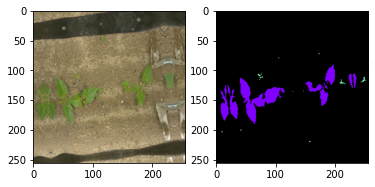

'\nrgb_img = cv2.imread(\'/content/Development_Dataset_15/training/images/Pead_mais_00070_i900.jpg\', cv2.IMREAD_UNCHANGED)  # open image\nproper_h = 384\nproper_w = 512\n    # resize to see how it works with kernels\n\n\n\n    # get exgreen\nexgr = None\nexgr_mask = None\nexgr = exgreen(rgb_img)\nprint("Exgr shape: ", exgr.shape)\n\nexgr_mask = thresh(exgr, 50)\n#exgr.resize([proper_h, proper_w, 3])\nim_gray_plt(exgr)\nim_gray_plt(exgr_mask)\n'

In [15]:
fig, ax = plt.subplots(1, 2)

augmented_img, target = next(iterator)

augmented_img = augmented_img[0]   # First element
augmented_img = augmented_img  # denormalize

target = np.array(target[0, ..., 0])   # First element (squeezing channel dimension)

print(np.unique(target))

target_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, 3):
  target_img[np.where(target == i)] = np.array(colors[i-1])[:3] * 255

ax[0].imshow(np.uint8(augmented_img))
ax[1].imshow(np.uint8(target_img))

plt.show()

augmented_img, target = next(iterator)
'''
rgb_img = cv2.imread('/content/Development_Dataset_15/training/images/Pead_mais_00070_i900.jpg', cv2.IMREAD_UNCHANGED)  # open image
proper_h = 384
proper_w = 512
    # resize to see how it works with kernels



    # get exgreen
exgr = None
exgr_mask = None
exgr = exgreen(rgb_img)
print("Exgr shape: ", exgr.shape)

exgr_mask = thresh(exgr, 50)
#exgr.resize([proper_h, proper_w, 3])
im_gray_plt(exgr)
im_gray_plt(exgr_mask)
'''

In [ ]:
vgg = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_h, img_w, 3))
vgg.summary()
for layer in vgg.layers:
  layer.trainable = False

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

## Convolutional Neural Network (CNN)
### Encoder-Decoder

In [16]:
# Create Model
# ------------

def create_model(depth, start_f, num_classes, dynamic_input_shape):

    model = tf.keras.Sequential()
    
    # Encoder
    # -------
    for i in range(depth):
        
        if i == 0:
            if dynamic_input_shape:
                input_shape = [None, None, 3]
            else:
                input_shape = [img_h, img_w, 3]
        else:
            input_shape=[None]
        
        model.add(tf.keras.layers.Conv2D(filters=start_f, 
                                         kernel_size=(3, 3),
                                         strides=(1, 1),
                                         padding='same',
                                         input_shape=input_shape))
        model.add(tf.keras.layers.ReLU())
        model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

        start_f *= 2

    # Bottleneck => does not have pooling
    model.add(tf.keras.layers.Conv2D(filters=start_f, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(tf.keras.layers.ReLU())
    
    start_f = start_f // 2 # Start to decrease the number of features
        
    # Decoder: recover details
    # -------
    for i in range(depth):
        model.add(tf.keras.layers.UpSampling2D(2, interpolation='bilinear')) # 2 means that double the input dimension
        # Now conv + ReLU transform the upsampled features into dense features
        model.add(tf.keras.layers.Conv2D(filters=start_f,
                                         kernel_size=(3, 3),
                                         strides=(1, 1),
                                         padding='same'))
        model.add(tf.keras.layers.ReLU())

        start_f = start_f // 2

    # Prediction Layer i.e. classification layer => FC layer convolutionalized
    # ----------------
    model.add(tf.keras.layers.Conv2D(filters=1, # only 1 output neuron since the classification is binary: output => 0 == background, 1 == object
                                     kernel_size=(1, 1), # => FC layer convolutionalized
                                     strides=(1, 1), # stride of a FC layer
                                     padding='same', # or valid: kernel is (1,1) and stride (1,1) so is not important
                                     activation='sigmoid'))
    
    return model

In [17]:
model = create_model(depth=5, 
                     start_f=8, 
                     num_classes=3, 
                     dynamic_input_shape=False)

# Visualize created model as a table
model.summary()

# Visualize initialized weights
# model.weights

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 8)       224       
_________________________________________________________________
re_lu (ReLU)                 (None, 256, 256, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      1168      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4

## Prepare the model for training

In [18]:
# Optimization params
# -------------------

# Loss
# Sparse Categorical Crossentropy to use integers (mask) instead of one-hot encoded labels
loss = tf.keras.losses.SparseCategoricalCrossentropy() 
# learning rate
lr = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
# -------------------

# Here we define the intersection over union for each class in the batch.
# Then we compute the final iou as the mean over classes
def meanIoU(y_true, y_pred):
    # get predicted class from softmax
    y_pred = tf.expand_dims(tf.argmax(y_pred, -1), -1)

    per_class_iou = []

    for i in range(1,2): # exclude the background class 0
      # Get prediction and target related to only a single class (i)
      class_pred = tf.cast(tf.where(y_pred == i, 1, 0), tf.float32)
      class_true = tf.cast(tf.where(y_true == i, 1, 0), tf.float32)
      intersection = tf.reduce_sum(class_true * class_pred)
      union = tf.reduce_sum(class_true) + tf.reduce_sum(class_pred) - intersection
    
      iou = (intersection + 1e-7) / (union + 1e-7)
      per_class_iou.append(iou)

    return tf.reduce_mean(per_class_iou)

# Validation metrics
# ------------------
metrics = ['accuracy', meanIoU]
# ------------------

# Compile Model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

## Training with callbacks

In [19]:
import os
from datetime import datetime

cwd = os.getcwd()

exps_dir = os.path.join(cwd, 'drive/My Drive/Challenge_2/', 'segmentation_experiments')
if not os.path.exists(exps_dir):
    os.makedirs(exps_dir)

now = datetime.now().strftime('%b%d_%H-%M-%S')

model_name = 'CNN'

exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)
    
callbacks = []

# Model checkpoint
# ----------------
ckpt_dir = os.path.join(exp_dir, 'ckpts')
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp_{epoch:02d}.ckpt'), 
                                                   save_weights_only=True)  # False to save the model directly
callbacks.append(ckpt_callback)

# Early Stopping
# --------------
early_stop = False
if early_stop:
    es_callback = tf.keras.callback.EarlyStopping(monitor='val_loss', patience=10)
    callbacks.append(es_callback)


model.fit(x=train_dataset,
          epochs=100,  #### set repeat in training dataset
          steps_per_epoch=len(dataset),
          validation_data=valid_dataset,
          validation_steps=len(dataset_valid), 
          callbacks=callbacks)

# How to visualize Tensorboard

# 1. tensorboard --logdir EXPERIMENTS_DIR --port PORT     <- from terminal
# 2. localhost:PORT   <- in your browser

Epoch 1/100
  5/608 [..............................] - ETA: 42:01 - loss: nan - accuracy: 0.7431 - meanIoU: 8.2435e-13

KeyboardInterrupt: ignored

## Test model

## Compute prediction

In [ ]:
model.load_weights('/content/drive/My Drive/Keras4/multiclass_segmentation_experiments/CNN_Nov27_08-41-36/ckpts/cp_02.ckpt')

In [ ]:
import time
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

iterator = iter(valid_dataset)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(8, 8))
fig.show()
image, target = next(iterator)

image = image[0]
target = target[0, ..., 0]

out_sigmoid = model.predict(x=tf.expand_dims(image, 0))

# Get predicted class as the index corresponding to the maximum value in the vector probability
# predicted_class = tf.cast(out_sigmoid > score_th, tf.int32)
# predicted_class = predicted_class[0, ..., 0]
predicted_class = tf.argmax(out_sigmoid, -1)

out_sigmoid.shape

predicted_class = predicted_class[0, ...]

# Assign colors (just for visualization)
target_img = np.zeros([target.shape[0], target.shape[1], 3])
prediction_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, 21):
  target_img[np.where(target == i)] = np.array(colors[i-1])[:3] * 255

prediction_img[np.where(predicted_class == 0)] = [0, 0, 0]
for i in range(1, 21):
  prediction_img[np.where(predicted_class == i)] = np.array(colors[i-1])[:3] * 255

ax[0].imshow(np.uint8(image))
ax[1].imshow(np.uint8(target_img))
ax[2].imshow(np.uint8(prediction_img))

fig.canvas.draw()
time.sleep(1)

# Model Setup

# Training

# Execution

# Result csv

In [ ]:
# Create folder for prediction files (csv)
! mkdir '/content/drive/My Drive/Challenge_1/result_csv'

# ------------------------------------
# Create the csv file with predictions
# ------------------------------------
def create_csv(results, results_dir='/content/drive/My Drive/Challenge_2/result_csv'):
  import os
  from datetime import datetime

  csv_fname = 'results_'
  csv_fname += datetime.now().strftime('%b%d_%H-%M-%S') + '.csv'

  with open(os.path.join(results_dir, csv_fname), 'w') as f:
      f.write('ImageId,EncodedPixels,Width,Height\n')
      for key, value in results.items():
          f.write(key + ',' + str(value) + ',' + '256' + ',' + '256' + '\n')


## !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!   QUANDO CAMBI DIMENSIONI DELLE IMMAGINI CAMBIA ANCHE QUA

In [ ]:
def rle_encode(img):
      # Flatten column-wise
      pixels = img.T.flatten()
      pixels = np.concatenate([[0], pixels, [0]])
      runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
      runs[1::2] -= runs[::2]
      return ' '.join(str(x) for x in runs)

In [ ]:
! ls '/content/drive/My Drive/Challenge_1/result_csv'

In [ ]:
# --------------------------------------
# Make predictions and save the csv file
# --------------------------------------
from PIL import Image

image_filenames = next(os.walk('/content/MaskDataset/test'))[2]

results = {}
for image_name in image_filenames:
  tmp_path = os.path.join(cwd, 'MaskDataset/test', image_name)

  img = Image.open(tmp_path).convert('RGB')
  img = img.resize((600, 600))

  img_array = np.array(img)
  img_array = np.expand_dims(img_array, 0) 
   
  # Data Normalization
  img_array = tf.keras.applications.efficientnet.preprocess_input(x=img_array)
  out_softmax = model.predict(x=img_array)

  prediction = tf.math.argmax(out_softmax, 1)   # predicted class

  results[image_name] = prediction[0].numpy()

create_csv(results)

! ls '/content/drive/My Drive/Challenge_1/result_csv'

In [ ]:
# ---------------------------------------
# Save the model trained with fine tuning
# ---------------------------------------
! mkdir '/content/drive/My Drive/Challenge_1/model'
! mkdir '/content/drive/My Drive/Challenge_1/model/EffNet_B7_dense_16_NOdropout_fine_tuning_block5-6-7'
model.save('/content/drive/My Drive/Challenge_1/model/EffNet_B7_dense_16_NOdropout_fine_tuning_block5-6-7')